In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data and performing EDA
fraud_data=pd.read_csv('/home/suraj/Downloads/Assignments/Assignment-14/Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [4]:
fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [11]:
fraud_data.rename(columns = {'Marital.Status' : 'marital_status', 'Taxable.Income': 'Income', 'City.Population': 'Population',
                    'Work.Experience': 'work_exp'}, inplace= True)

In [20]:
fraud_data['status'] = fraud_data['Income'].apply(lambda x : 'risky' if x <= 30000 else 'good')
fraud_data

,Undergrad,marital_status,Income,Population,work_exp,Urban,status
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,good
596,YES,Divorced,69967,55369,2,YES,good
597,NO,Divorced,47334,154058,0,YES,good
598,YES,Married,98592,180083,17,NO,good


In [23]:
fraud_data.drop('Income', axis=1, inplace=True)

In [24]:
fraud_data

,Undergrad,marital_status,Population,work_exp,Urban,status
0,NO,Single,50047,10,YES,good
1,YES,Divorced,134075,18,YES,good
2,NO,Married,160205,30,YES,good
3,YES,Single,193264,15,YES,good
4,NO,Married,27533,28,NO,good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,good
596,YES,Divorced,55369,2,YES,good
597,NO,Divorced,154058,0,YES,good
598,YES,Married,180083,17,NO,good


In [25]:
# data preprocessing
from sklearn.preprocessing import LabelEncoder

In [28]:
le =LabelEncoder()
fraud_data['Undergrad'] = le.fit_transform(fraud_data['Undergrad'])
fraud_data['marital_status'] = le.fit_transform(fraud_data['marital_status'])
fraud_data['Urban'] = le.fit_transform(fraud_data['Urban'])
fraud_data['status'] = le.fit_transform(fraud_data['status'])

In [30]:
fraud_data.head()

,Undergrad,marital_status,Population,work_exp,Urban,status
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [31]:
X = fraud_data.iloc[:,:5]
y = fraud_data.iloc[:,-1:]

In [34]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2,random_state=12)

In [43]:
#Model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
#Model selection
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model,param_grid = {'max_depth': range(1,10),'criterion':['gini','entropy']},cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10)})

In [39]:
grid_search.best_params_, grid_search.best_score_

({'criterion': 'gini', 'max_depth': 3}, 0.76875)

In [44]:
#model 1 : criterion='gini',max_depth=3
model1 = DecisionTreeClassifier(criterion='gini',max_depth=3)
model1.fit(X_train,y_train)

y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

print('training Accuracy  : ',accuracy_score(y_train,y_train_pred1))
print('test Accuracy      : ',accuracy_score(y_test,y_test_pred1))
print('training confusion_matrix  : \n',confusion_matrix(y_train,y_train_pred1))
print('test confusion_matrix  : \n',confusion_matrix(y_test,y_test_pred1))

training Accuracy  :  0.7791666666666667
test Accuracy      :  0.85
training confusion_matrix  : 
 [[366   3]
 [103   8]]
test confusion_matrix  : 
 [[102   5]
 [ 13   0]]


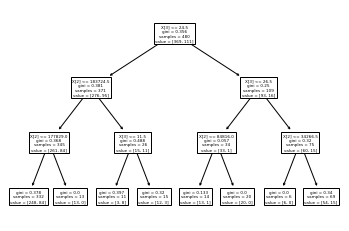

In [48]:
#Plot the Decision tree
from sklearn import tree
tree.plot_tree(model1)
plt.show()

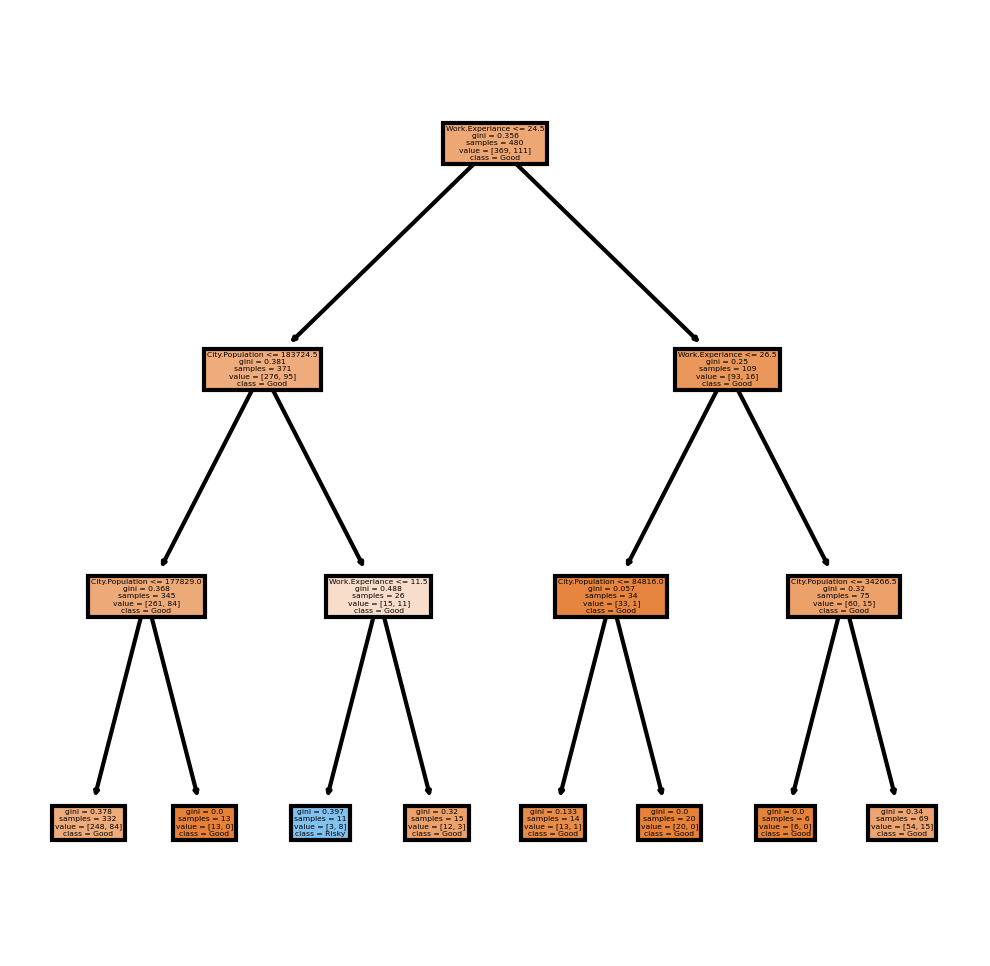

In [56]:
fn = ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experiance', 'Urban']
cn = ['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [57]:
feature= pd.Series(model1.feature_importances_,index=fn).sort_values(ascending=False)
feature

Work.Experiance    0.646918
City.Population    0.353082
Undergrad          0.000000
Marital.Status     0.000000
Urban              0.000000
dtype: float64

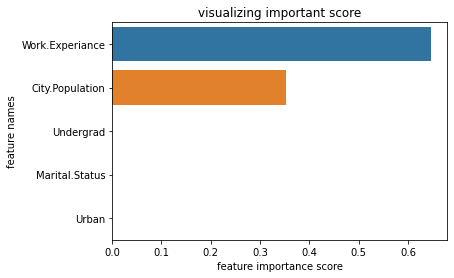

In [58]:
import seaborn as sns
sns.barplot(x=feature,y=feature.index)
plt.xlabel("feature importance score")
plt.ylabel("feature names")
plt.title("visualizing important score")
plt.show()

In [69]:
# Since there is overfitting problem

In [75]:
#model 2 : criterion='gini',max_depth=8
model2 = DecisionTreeClassifier(criterion='gini',max_depth=8)
model2.fit(X_train,y_train)

y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)

print('training Accuracy  : ',accuracy_score(y_train,y_train_pred2))
print('test Accuracy      : ',accuracy_score(y_test,y_test_pred2))
print('training confusion_matrix  : \n',confusion_matrix(y_train,y_train_pred2))
print('test confusion_matrix  : \n',confusion_matrix(y_test,y_test_pred2))

training Accuracy  :  0.8270833333333333
test Accuracy      :  0.825
training confusion_matrix  : 
 [[365   4]
 [ 79  32]]
test confusion_matrix  : 
 [[99  8]
 [13  0]]


In [73]:
#model 3 : criterion='entropy',max_depth=8
model3 = DecisionTreeClassifier(criterion='entropy',max_depth=9)
model3.fit(X_train,y_train)

y_train_pred3 = model3.predict(X_train)
y_test_pred3 = model3.predict(X_test)

print('training Accuracy  : ',accuracy_score(y_train,y_train_pred3))
print('test Accuracy      : ',accuracy_score(y_test,y_test_pred3))
print('training confusion_matrix  : \n',confusion_matrix(y_train,y_train_pred3))
print('test confusion_matrix  : \n',confusion_matrix(y_test,y_test_pred3))

training Accuracy  :  0.8333333333333334
test Accuracy      :  0.8166666666666667
training confusion_matrix  : 
 [[367   2]
 [ 78  33]]
test confusion_matrix  : 
 [[98  9]
 [13  0]]


In [76]:
feature1= pd.Series(model2.feature_importances_,index=fn).sort_values(ascending=False)
feature1

City.Population    0.611291
Work.Experiance    0.284448
Undergrad          0.046528
Marital.Status     0.033804
Urban              0.023929
dtype: float64

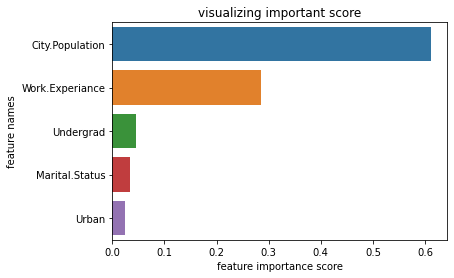

In [77]:
import seaborn as sns
sns.barplot(x=feature1,y=feature1.index)
plt.xlabel("feature importance score")
plt.ylabel("feature names")
plt.title("visualizing important score")
plt.show()